In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets._samples_generator import make_blobs
from mpl_toolkits.mplot3d import Axes3D

x, y = make_blobs(n_samples=10000,
                  n_features=3,
                  centers=[[3, 3, 3], [0, 0, 0], [1, 1, 1, ], [2, 2, 2]],
                  random_state=9,
                  cluster_std=[.2, .1, .2, .2])
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(x[:,0],x[:,1],x[:,2])

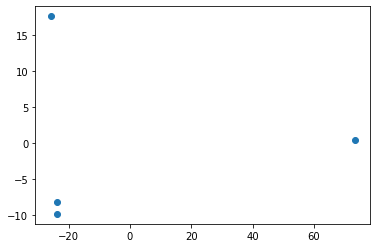

In [2]:
pca = PCA(n_components=2)
pca.fit(x)
new = pca.transform(x)
x = np.array([[3, 2, 3, 15, 2], [0, 1, 1, 2, 99], [1, 11, 1, 8, 2], [8, 10, 26, 2, 2]])
r = pca.fit_transform(x)
plt.scatter(r[:,0],r[:,1])

In [ ]:
pca = PCA(n_components=10, svd_solver='arpack', random_state=0)
new = pca.fit_transform(exp.toarray())

In [3]:
from sklearn.neighbors import NearestNeighbors
samples = [[0, 0, 9], [0, 1, 6], [0, 2, 20], [1, 0, 18], [1, 1, 24], [1, 2, 20]]
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(samples)

print(neigh.kneighbors([[2, 0, 16]]))


(array([[2.23606798]]), array([[3]], dtype=int64))


In [17]:
import scanpy as sc
import numpy as np
from anndata import AnnData

adata = AnnData(np.array([
   [3, 3, 3, 6, 6],
   [1, 1, 1, 2, 2],
   [1, 22, 1, 2, 2],
], dtype=np.float32))
adata.X

array([[ 3.,  3.,  3.,  6.,  6.],
       [ 1.,  1.,  1.,  2.,  2.],
       [ 1., 22.,  1.,  2.,  2.]], dtype=float32)

In [18]:
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
X_norm

array([[0.14285715, 0.14285715, 0.14285715, 0.2857143 , 0.2857143 ],
       [0.14285715, 0.14285715, 0.14285715, 0.2857143 , 0.2857143 ],
       [0.03571429, 0.78571427, 0.03571429, 0.07142857, 0.07142857]],
      dtype=float32)

In [36]:
X_norm = sc.pp.normalize_total(
    adata, target_sum=1, exclude_highly_expressed=True,
    max_fraction=.25, inplace=False)['X']
X_norm


array([[ 0.5,  0.5,  0.5,  1. ,  1. ],
       [ 0.5,  0.5,  0.5,  1. ,  1. ],
       [ 0.5, 11. ,  0.5,  1. ,  1. ]], dtype=float32)

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
img = cv2.imread('test.png')
img = img.resize((300,300))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 灰度图像
# open to see how to use: cv2.Canny
# http://blog.csdn.net/on2way/article/details/46851451

# hough transform
# lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30,
#                         minLineLength=100, maxLineGap=10)
# lines1 = lines[:, 0, :]  # 提取为二维
# for x1, y1, x2, y2 in lines1[:]:
#     cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 1)

# plt.subplot(122), plt.imshow(img,)
# plt.xticks([]), plt.yticks([])


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


(903, 745)


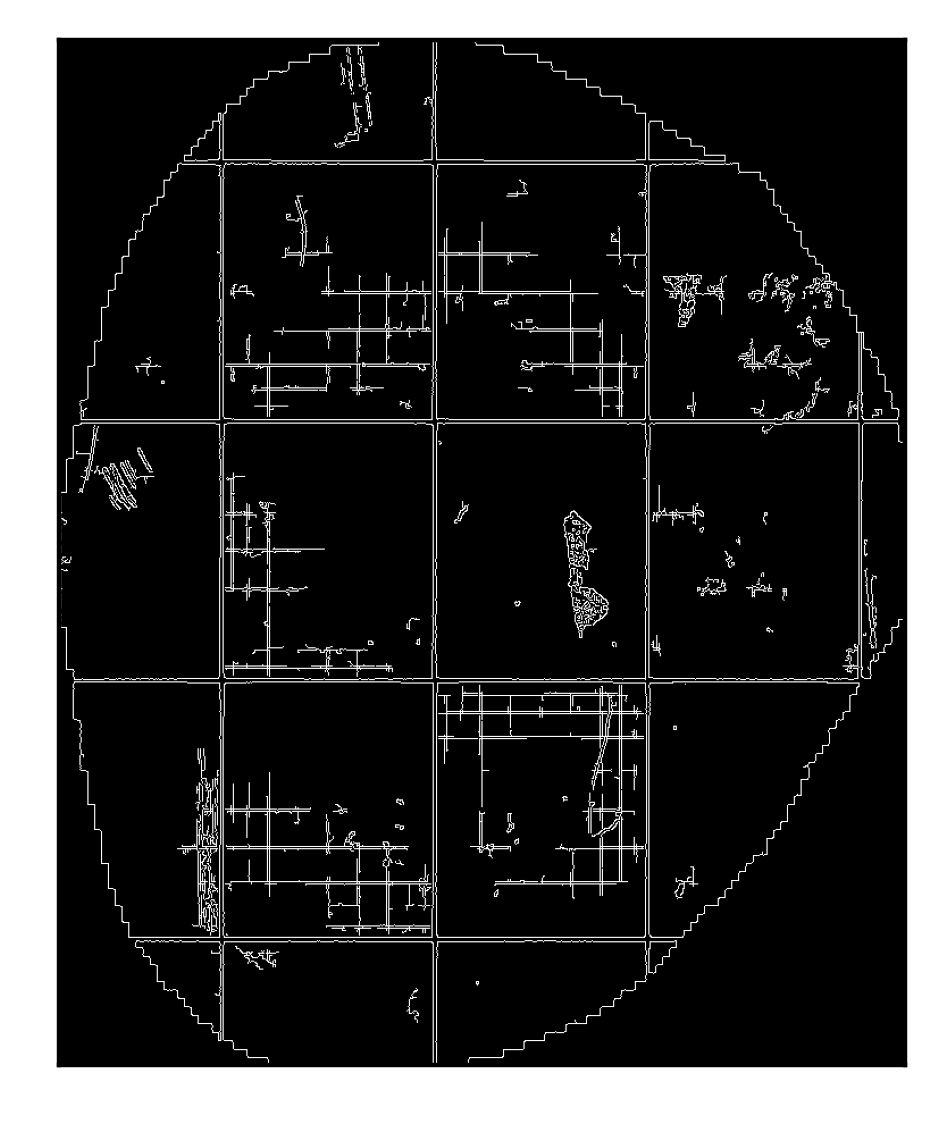

In [24]:
edges = cv2.Canny(image=gray,
                  threshold1=50,
                  threshold2=200)
plt.figure(dpi=400)
plt.subplot(121), plt.imshow(edges, 'gray')
plt.xticks([]), plt.yticks([])
print(edges.shape)